<a href="https://colab.research.google.com/github/DiegoMacielDM/An-lise-Explorat-ria-de-Dados---Doen-as-Cardiovasculares/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análise Exploratória de Dados - Doenças Cardiovasculares**
Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no lifestyle.

Existem hoje várias pesquisas na área de Machine Learning visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista na revista Nature Biomedical Engineering mostram que algoritmos de Deep Learning foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.

### Obtenção dos Dados
O conjunto principal de dados usado neste projeto foi coletado da Cleveland Clinic Foundation e se encontra disponível no conhecido [Repositório UCI Machine Learning.](https://archive.ics.uci.edu/ml/datasets/heart+Disease) Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O dataset processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de Data Science usará essas mesmas 14 variáveis principais.

Colaboratory logo

  * O arquivo csv com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

  * O arquivo contendo todos os detalhes e documentação do dataset usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

  * Há ainda um dataset secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).

In [136]:
#Importando as bibliotecas pandas e matplotlib do Python
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil, parse_dates=True)

In [138]:
#Visualizando o DataFrame UCI
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [139]:
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672



Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (num) possui cinco valores possíveis: [0, 1, 2, 3, 4].

No entanto, seguindo a maioria das pesquisas que utilizaram esse dataset, iremos considerar apenas duas situações possíveis:

0 - não há doença cardíaca
1 - há doença cardíaca
Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [140]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [147]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [146]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

# **ANÁLISE EXPLORATÓRIA DE DADOS**
  * Ver o tamanho do df 
  * Ver a descrição estatística do df
  * Ver os tipos das variáveis do df 
  * Ver as 5 primeiras entradas do df
  * Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no dataset 
  * Ver valores ausentes do df
  * Plotar o gráfico de linha para df_brasil
  * Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
  * Plotar o gráfico de dispersão para as variáveis age e chol
  * plotar um histograma para o colesterol sérico
  * plotar um gráfico de pizza para restecg
  * Plotar um heatmap com as correlações
  * Qualquer outra análise que você quiser.
NÃO escreve apenas código. Um projeto ou relatório é para fornecer insumos e informações para alguém. SEMPRE documente, escreva e formule suas hipóteses. Você NÃO está escrevendo para outro programador ler. Você está preparando um relatório para os Diretores de nível estratégico de uma empresa.

In [144]:
#Visualizando o tamanho do DataFrame com (Shape)
df.shape

(303, 14)

In [143]:
#Visualizando a descrição estatística do DataFrame com (describe)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [145]:
#Visualizando os tipos das variáveis do df (dtypes)
df.dtypes


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [148]:
#Visualizando as 5 primeiras entradas do df (head)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [149]:
#Contando quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no dataset com (value_counts)
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [150]:
#Visualizando os valores ausentes do df com o (isnull().sum())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [151]:
#Visualizando o DataFrame df_brasil
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


In [152]:
df_brasil.ano.max()

2017

In [153]:
df_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano                    14 non-null     int64  
 1   mortes_doencas_cardio  14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


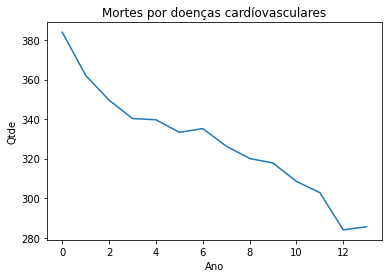

In [154]:
#Plotando o gráfico de linha para df_brasil
plt.plot(df_brasil["mortes_doencas_cardio"])
plt.title('Mortes por doenças cardíovasculares')
plt.ylabel('Qtde')
plt.xlabel('Ano')
plt.show()

In [155]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [156]:
#Substituindo caracteres por números
df['sex']= df['sex'].map({0:'Mulher', 1:'Homem'})

In [157]:
import seaborn as sns
df.sex.head()

0     Homem
1     Homem
2     Homem
3     Homem
4    Mulher
Name: sex, dtype: object

In [158]:
df.sex.value_counts()

Homem     206
Mulher     97
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


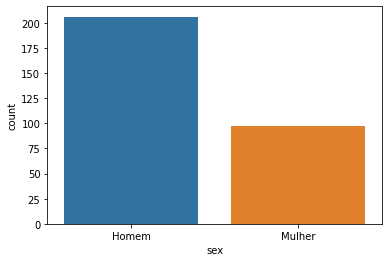

In [159]:
#Plotando um gráfico de barras para ver a quantidade de homens e mulheres em df
sns.countplot(df['sex']);

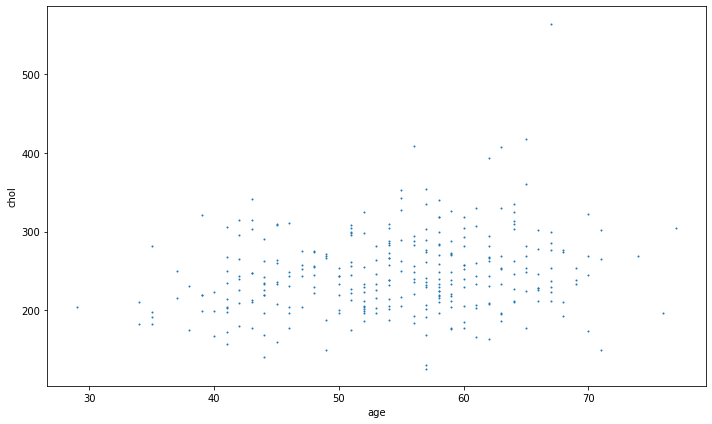

In [160]:
#Plotar o gráfico de dispersão para as variáveis age e chol
fig, ax = plt.subplots(figsize=(10,6))

#Informando quais dados serão plotados
df.plot.scatter(x='age',y='chol', ax=ax, s=1)

#Mostrando o gráfico
plt.tight_layout();


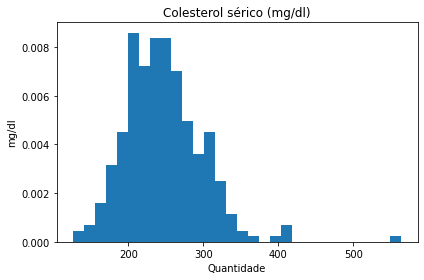

In [163]:
#plotar um histograma para o colesterol sérico
fig, ax = plt.subplots()

#Informando quais dados serão plotados
df["chol"].plot(kind="hist", ax=ax, density=True, bins=30);
#Colocando o titulo 
ax.set_title("Colesterol sérico (mg/dl)")
#Colocando o titulo de X
ax.set_xlabel("Quantidade")
#Colocando o titulo de Y
ax.set_ylabel("mg/dl")

#Mostrando o gráfico
plt.tight_layout();

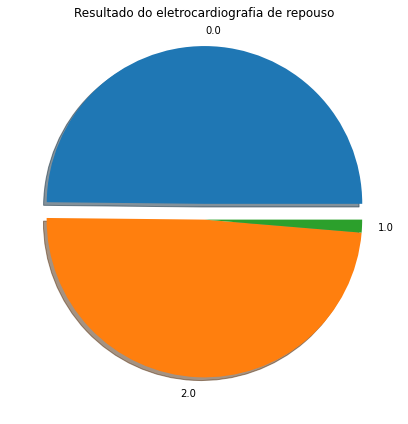

In [164]:
#* plotar um gráfico de pizza para restecg
#Extrair as ocorrências para um dicionário
restecg = dict(df.restecg.value_counts())
labels = restecg.keys()
sizes = restecg.values()
explode = (0.1, 0, 0 )

#Preparando os dados para o pie chart
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode=explode, shadow=True);

#Colocando o titulo 
ax.set_title("Resultado do eletrocardiografia de repouso")
#0 - Normal
#1 - anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
#2 - hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

#Mostrando o gráfico
plt.tight_layout();